<a href="https://colab.research.google.com/github/rahulkhattri0/Fake-news-detection/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# URL to the dataset
dataset_url = "https://www.kaggle.com/c/fake-news/data"

In [5]:
# Download the dataset manually from Kaggle and save it as "train.csv" in your working directory.
# Load the dataset using pandas
df = pd.read_csv("/content/gdrive/My Drive/fake_news/train.csv")

In [15]:
# Display the first few rows of the dataset
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [ ]:
# data preprocessing now
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Define functions for preprocessing
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove special characters, numbers, and symbols
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text):
    if isinstance(text, str):
        # Tokenization (split text into words)
        words = text.split()
        # Lowercasing
        words = [word.lower() for word in words]
        # Stopword removal
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        # Join the words back into a single string
        return ' '.join(words)
    else:
        return text

In [ ]:
# Download the "stopwords" and "wordnet" dataset
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Apply text cleaning and preprocessing to the 'text' column
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
# Handling missing data (remove rows with missing text)
df.dropna(subset=['text'], inplace=True)

In [ ]:
# Display the preprocessed text
print(df['text'].head())

0    house dem aide didnt even see comeys letter ja...
1    ever get feeling life circle roundabout rather...
2    truth might get fired october 29 2016 tension ...
3    video 15 civilian killed single u airstrike id...
4    print iranian woman sentenced six year prison ...
Name: text, dtype: object


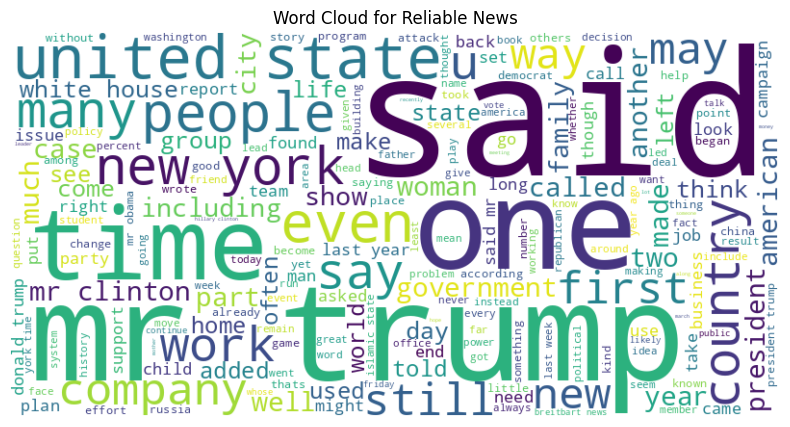

In [ ]:
#Data Visualization
#Word Cloud
'''
A word cloud is a data visualization technique that displays the most frequently occurring words in a piece of text data.
It provides a visual representation of text data where the size of each word is proportional to its frequency in the text.
Common words are typically displayed in a larger and bolder font, making them more prominent in the visualization.
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the text in your dataset (either reliable or unreliable)
text = ' '.join(df[df['label'] == 0]['text'])  # Replace with your dataset

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Reliable News")
plt.show()

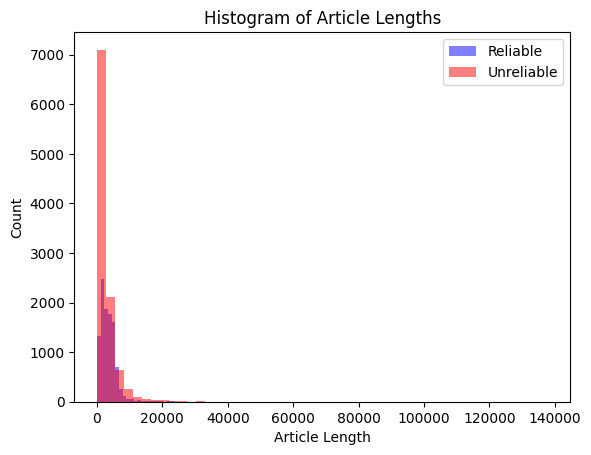

In [ ]:
#Histogram of Article Lengths
'''
A histogram for article length is a data visualization that provides insight into the distribution of article lengths within a dataset.
It shows how many articles fall into different length ranges or bins. Each bar in the histogram represents a range of article lengths,
and the height of the bar indicates the number of articles that have lengths within that range.
'''
import matplotlib.pyplot as plt


reliable_articles = df[df['label'] == 0]
unreliable_articles = df[df['label'] == 1]

plt.hist([len(article) for article in reliable_articles['text']], bins=50, alpha=0.5, label='Reliable', color='blue')
plt.hist([len(article) for article in unreliable_articles['text']], bins=50, alpha=0.5, label='Unreliable', color='red')
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.title('Histogram of Article Lengths')
plt.legend(loc='upper right')
plt.show()

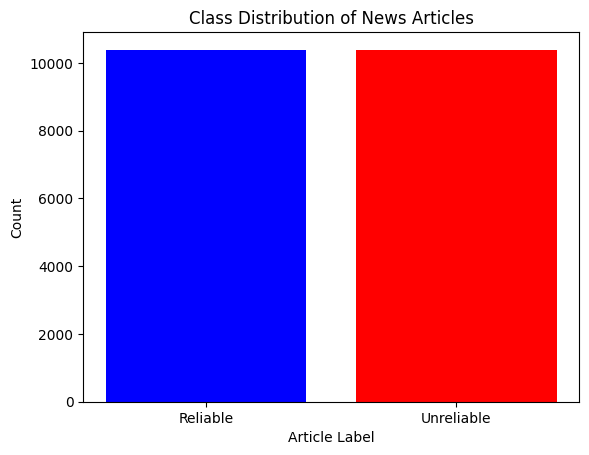

In [ ]:
#bar chart
'''
A Bar Chart for Class Distribution is a data visualization that displays the distribution of classes or categories in a dataset.
'''
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with a 'label' column
# df is your processed dataset
reliable_count = df[df['label'] == 0]['label'].count()
unreliable_count = df[df['label'] == 1]['label'].count()

# Create a bar chart
labels = ['Reliable', 'Unreliable']
counts = [reliable_count, unreliable_count]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Article Label')
plt.ylabel('Count')
plt.title('Class Distribution of News Articles')
plt.show()

In [13]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.4 MB/s eta 0:00:00


In [ ]:
# Model training using BERT
import numpy as np
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Tokenize and prepare data for BERT
X_train_encoded = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt', max_length=128)
X_test_encoded = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt', max_length=128)
y_train_tensor = torch.tensor(list(y_train))
y_test_tensor = torch.tensor(list(y_test))

# Create DataLoader
train_dataset = TensorDataset(X_train_encoded.input_ids, X_train_encoded.attention_mask, y_train_tensor)
test_dataset = TensorDataset(X_test_encoded.input_ids, X_test_encoded.attention_mask, y_test_tensor)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move the model and datasets to the GPU
model.to(device)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32)


# Define the BERT fine-tuning parameters
num_epochs = 3
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs
)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = (
            input_ids.to(device),
            attention_mask.to(device),
            labels.to(device)
        )
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Optional gradient clipping
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Average Training Loss: 0.1758
Epoch 2/3, Average Training Loss: 0.0538
Epoch 3/3, Average Training Loss: 0.0199


In [ ]:
# Evaluation
model.eval()
all_preds = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = np.argmax(logits.to("cpu").numpy(), axis=1)
        all_preds.extend(preds)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(list(y_test), all_preds)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(list(y_test), all_preds)
print(classification_rep)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2079
           1       0.99      0.97      0.98      2074

    accuracy                           0.98      4153
   macro avg       0.98      0.98      0.98      4153
weighted avg       0.98      0.98      0.98      4153



In [ ]:
output_dir = "/content/gdrive/My Drive/fake_news"

# Save the model to the specified directory in Google Drive
model.save_pretrained(output_dir)

# Save the tokenizer as well
tokenizer.save_pretrained(output_dir)

('/content/gdrive/My Drive/fake_news/tokenizer_config.json',
 '/content/gdrive/My Drive/fake_news/special_tokens_map.json',
 '/content/gdrive/My Drive/fake_news/vocab.txt',
 '/content/gdrive/My Drive/fake_news/added_tokens.json')

In [7]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [8]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=6ff1cc07be54c74a819668c182a2e3a59f1cf2ac18b9289a7a67b1e3ba5f2ba5
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [9]:
from pyngrok import ngrok

In [10]:
ngrok.set_auth_token("2X3vT2UyrHJStb1ZjD3PB8baFC2_2YMSPBuvDzhWB1UpLkXXw")

In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the trained model and tokenizer
model_output_dir = "/content/gdrive/My Drive/fake_news"  # Replace with your model directory
model = BertForSequenceClassification.from_pretrained(model_output_dir)
tokenizer = BertTokenizer.from_pretrained(model_output_dir)

# Title and description
st.title("News Article Classification")
st.write("This app classifies news articles as reliable or unreliable.")

# Text input box
user_input = st.text_area("Enter a news article:")

if st.button("Classify"):
    # Tokenize the user input
    inputs = tokenizer(user_input, return_tensors="pt", padding=True, truncation=True, max_length=128)

    # Perform inference
    with torch.no_grad():
        logits = model(**inputs).logits

    # Calculate probabilities using softmax
    probabilities = torch.softmax(logits, dim=1)[0].tolist()

    # Determine the predicted class
    predicted_class = "Unreliable" if logits[0][1] > 0.5 else "Reliable"

    # Display the results
    st.write(f"Classification: {predicted_class}")
    st.write(f"Confidence (Reliable): {probabilities[0]:.2f}")
    st.write(f"Confidence (Unreliable): {probabilities[1]:.2f}")


Overwriting app.py


In [12]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect()
print(url)

nohup: appending output to 'nohup.out'


NgrokTunnel: "https://f85c-34-91-192-217.ngrok-free.app" -> "http://localhost:80"


In [22]:
testing = pd.read_csv("/content/gdrive/My Drive/fake_news/test.csv")

In [33]:
testing['text'][183]

"Russia Delivers Another 400 Tons of Humanitarian Aid to Donbass \nAs you can see, Moscow is continuing its 'invasion' of Ukraine Originally appeared at Sputnik \nRussian Emergencies Ministry’s trucks have delivered some 400 tons of humanitarian aid to eastern Ukrainian Donetsk and Luhansk, ministry’s press service said Thursday. \n“Over 40 trucks have arrived in Donetsk and Luhansk, carrying over 400 tons of humanitarian aid, mostly food and medicine,” the press service said. \nSince 2014, when the internal Ukrainian conflict erupted, Russia delivered over 64,000 tons of humanitarian aid to local residents, helping to avoid a humanitarian catastrophe.  "